In [1]:
%reload_ext autoreload
%autoreload 2
# check data path
import os, sys
path=os.path.abspath(os.getcwd())
sys.path.append('../driver')
sys.path.append('../../driver')
sys.path.append('../../../messungen')

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import fmr_eva as fmr_eva
# import fmr_eva2 as fmr_eva2
# import fmr_read as fmr_read
# import fmr_read2 as fmr_read2

import FMR_Reader_v210208 as FMR_Reader
import FMR_Evaluator_v210331 as FMR_eva
import corporate_design_colors_v3 as cpd

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

no style found


In [2]:
dataset_bf_down='BF Cobulk30nm HSWEEP down'
dataset_bf_up='BF Cobulk30nm HSWEEP up'
d_bf_up=FMR_Reader.read(dataset_bf_up, loc='../../../messungen/')
d_bf_down=FMR_Reader.read(dataset_bf_down, loc='../../../messungen/')

100%|██████████| 153/153 [00:17<00:00,  8.75it/s]


In [3]:
dataset_fh_up='FH Cobulk30nm up'
d_fh_up=FMR_Reader.read(dataset_fh_up, loc='../../../messungen/')
dataset_fh_down='FH Cobulk30nm down'
d_fh_down=FMR_Reader.read(dataset_fh_down, loc='../../../messungen/')

  1%|          | 4/321 [00:00<00:10, 30.07it/s]

Initialized with +3T


100%|██████████| 321/321 [00:10<00:00, 29.62it/s]

Initialized with +3T


In [4]:
Hmin=-.32
Hmax=.32
fmin=2
fmax=18
db_bf_up=FMR_eva.binning(d_bf_up, Hmin=Hmin, Hmax=Hmax, fmin=fmin, fmax=fmax)
db_bf_down=FMR_eva.binning(d_bf_down, Hmin=Hmin, Hmax=Hmax, fmin=fmin, fmax=fmax)
db_fh_up=FMR_eva.complex_binning(d_fh_up, Hmin=Hmin, Hmax=Hmax, fmin=fmin, fmax=fmax)
db_fh_down=FMR_eva.complex_binning(d_fh_down, Hmin=Hmin, Hmax=Hmax, fmin=fmin, fmax=fmax)

In [5]:
Hnorm=[.315]
dn_bf_up=FMR_eva.normT21(db_bf_up, Hnorm=Hnorm)
dn_bf_down=FMR_eva.normT21(db_bf_down, Hnorm=Hnorm)
dn_fh_up=FMR_eva.normS21(db_fh_up, Hnorm=Hnorm)
dn_fh_down=FMR_eva.normS21(db_fh_down, Hnorm=Hnorm)
#dn_bf_up,dn_bf_down,dn_fh_up,dn_fh_down

(-0.1, 0.1)

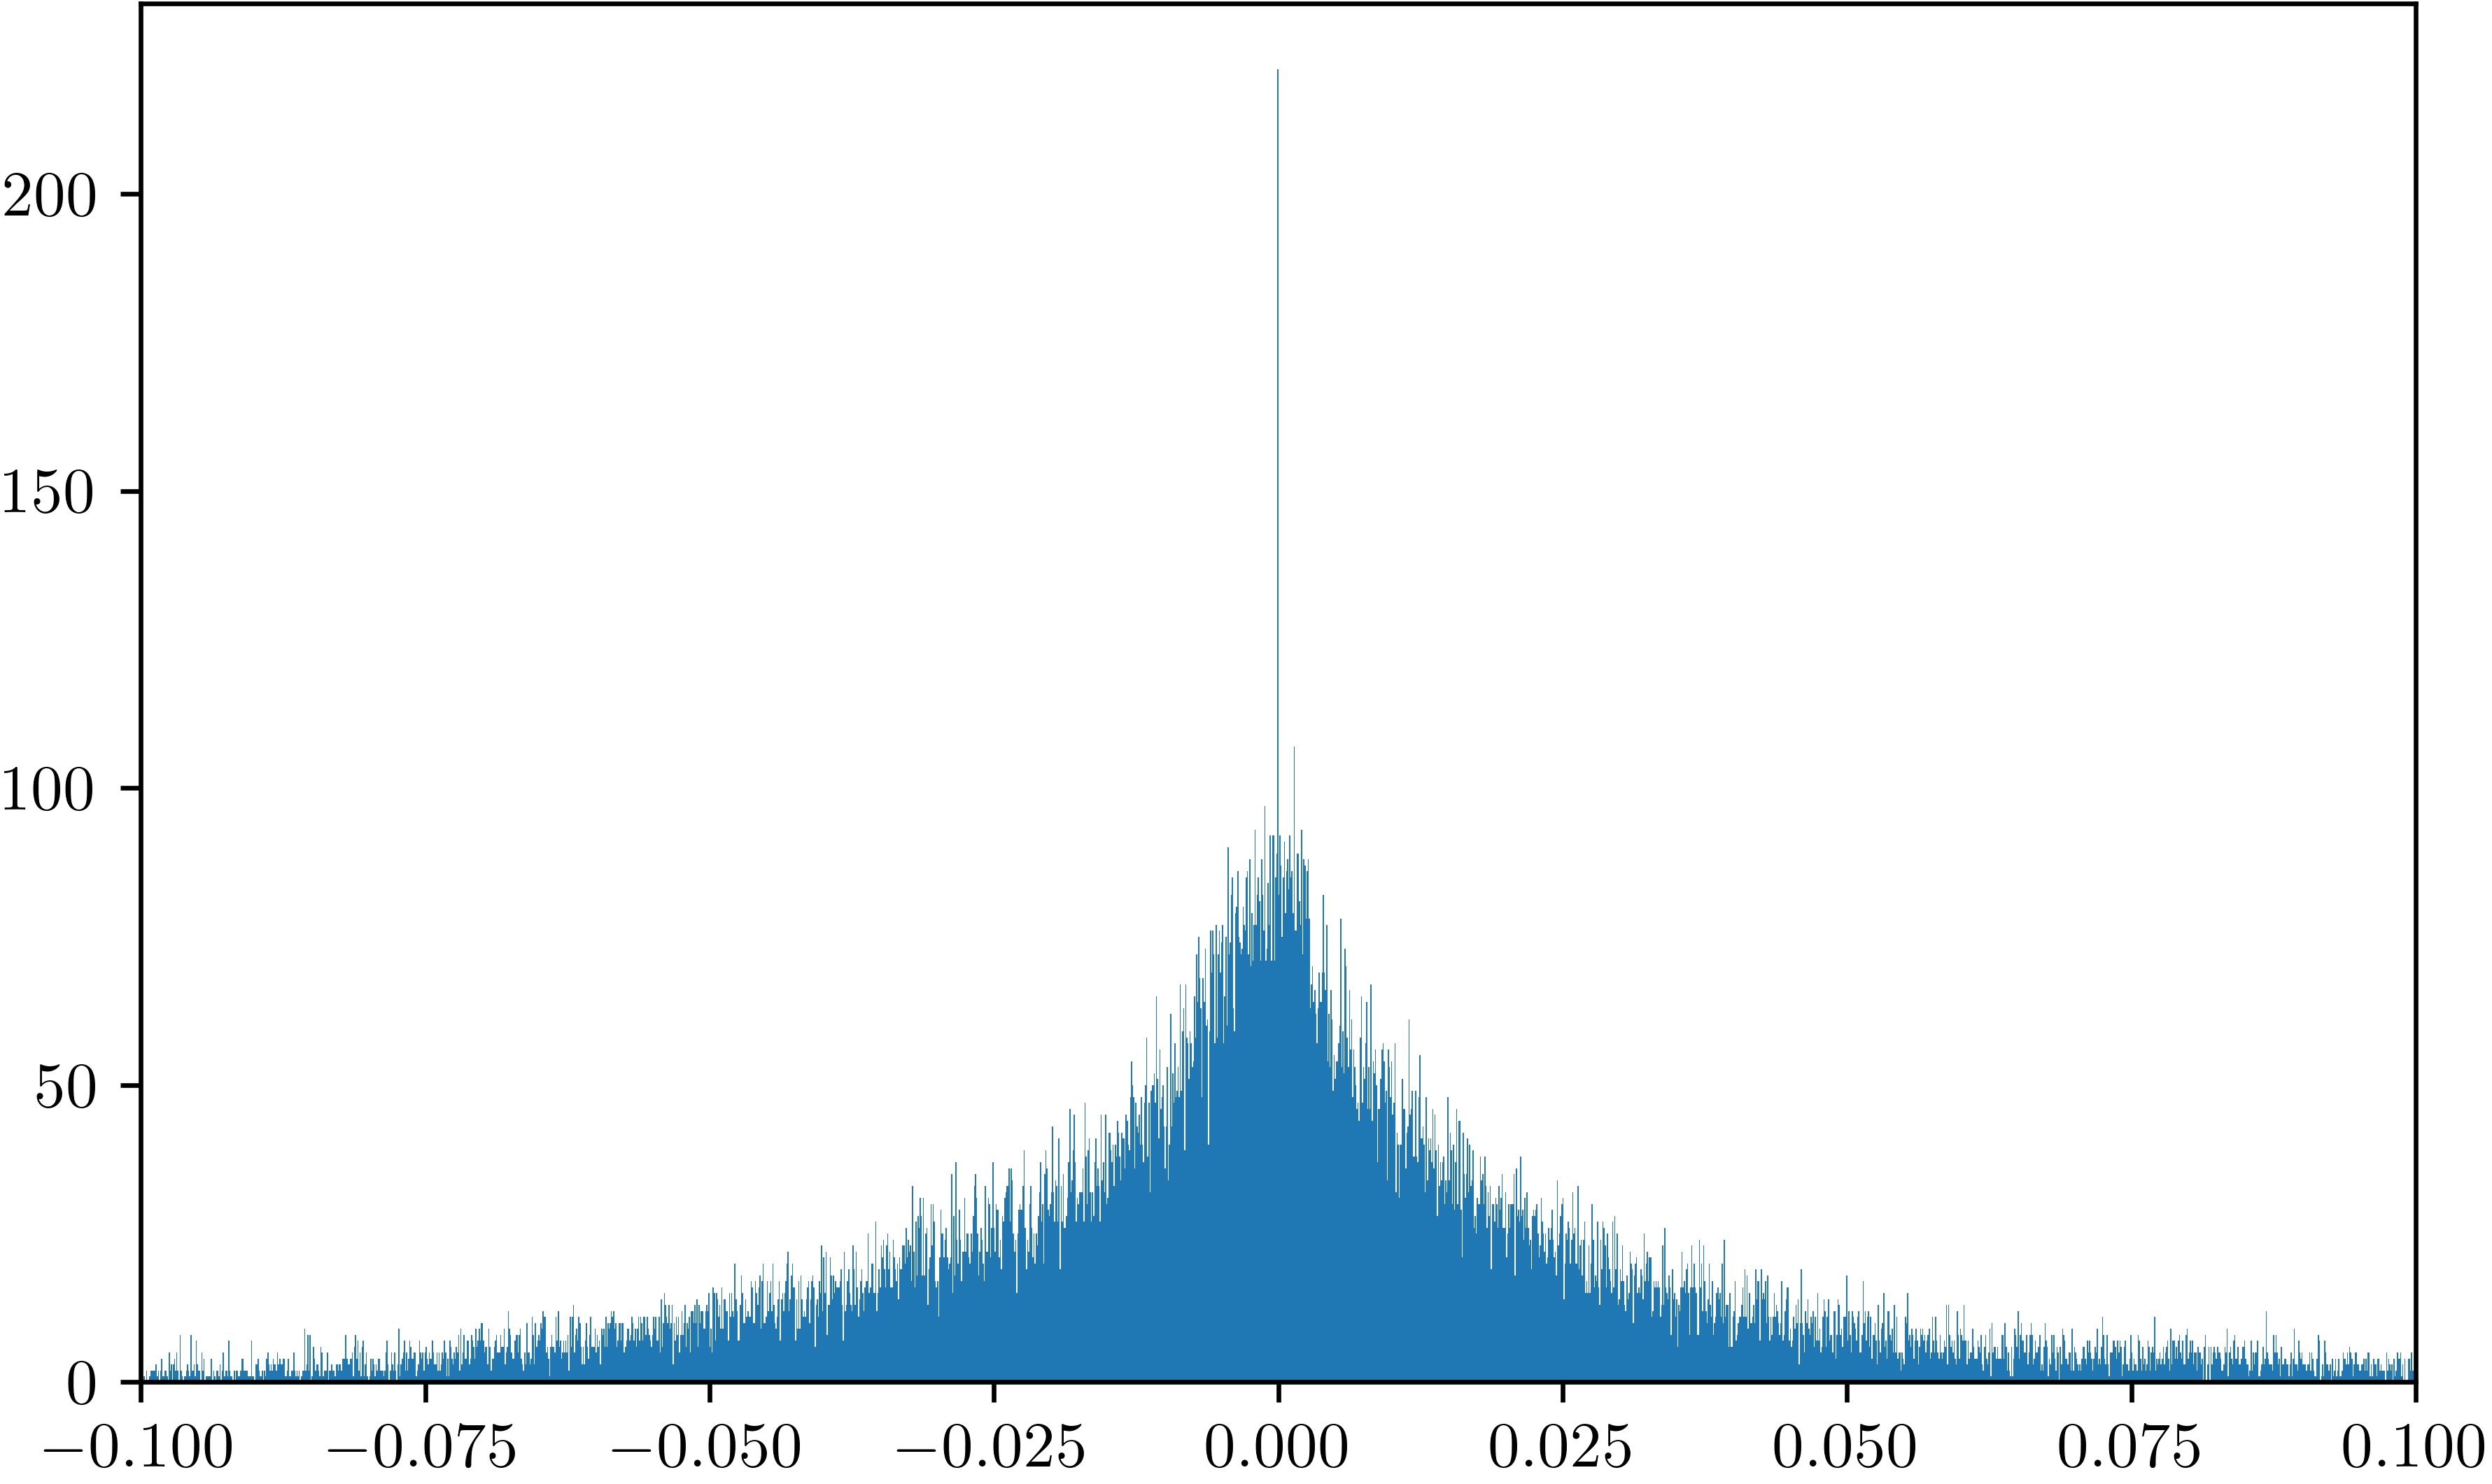

In [6]:
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

img_up=dn_bf_up['T21']
img_down=dn_bf_down['T21']
img=np.concatenate((img_up,img_down))
plt.hist(np.ravel(img), bins=10000)
plt.xlim([-.1,.1])

<Figure size 3600x2160 with 0 Axes>

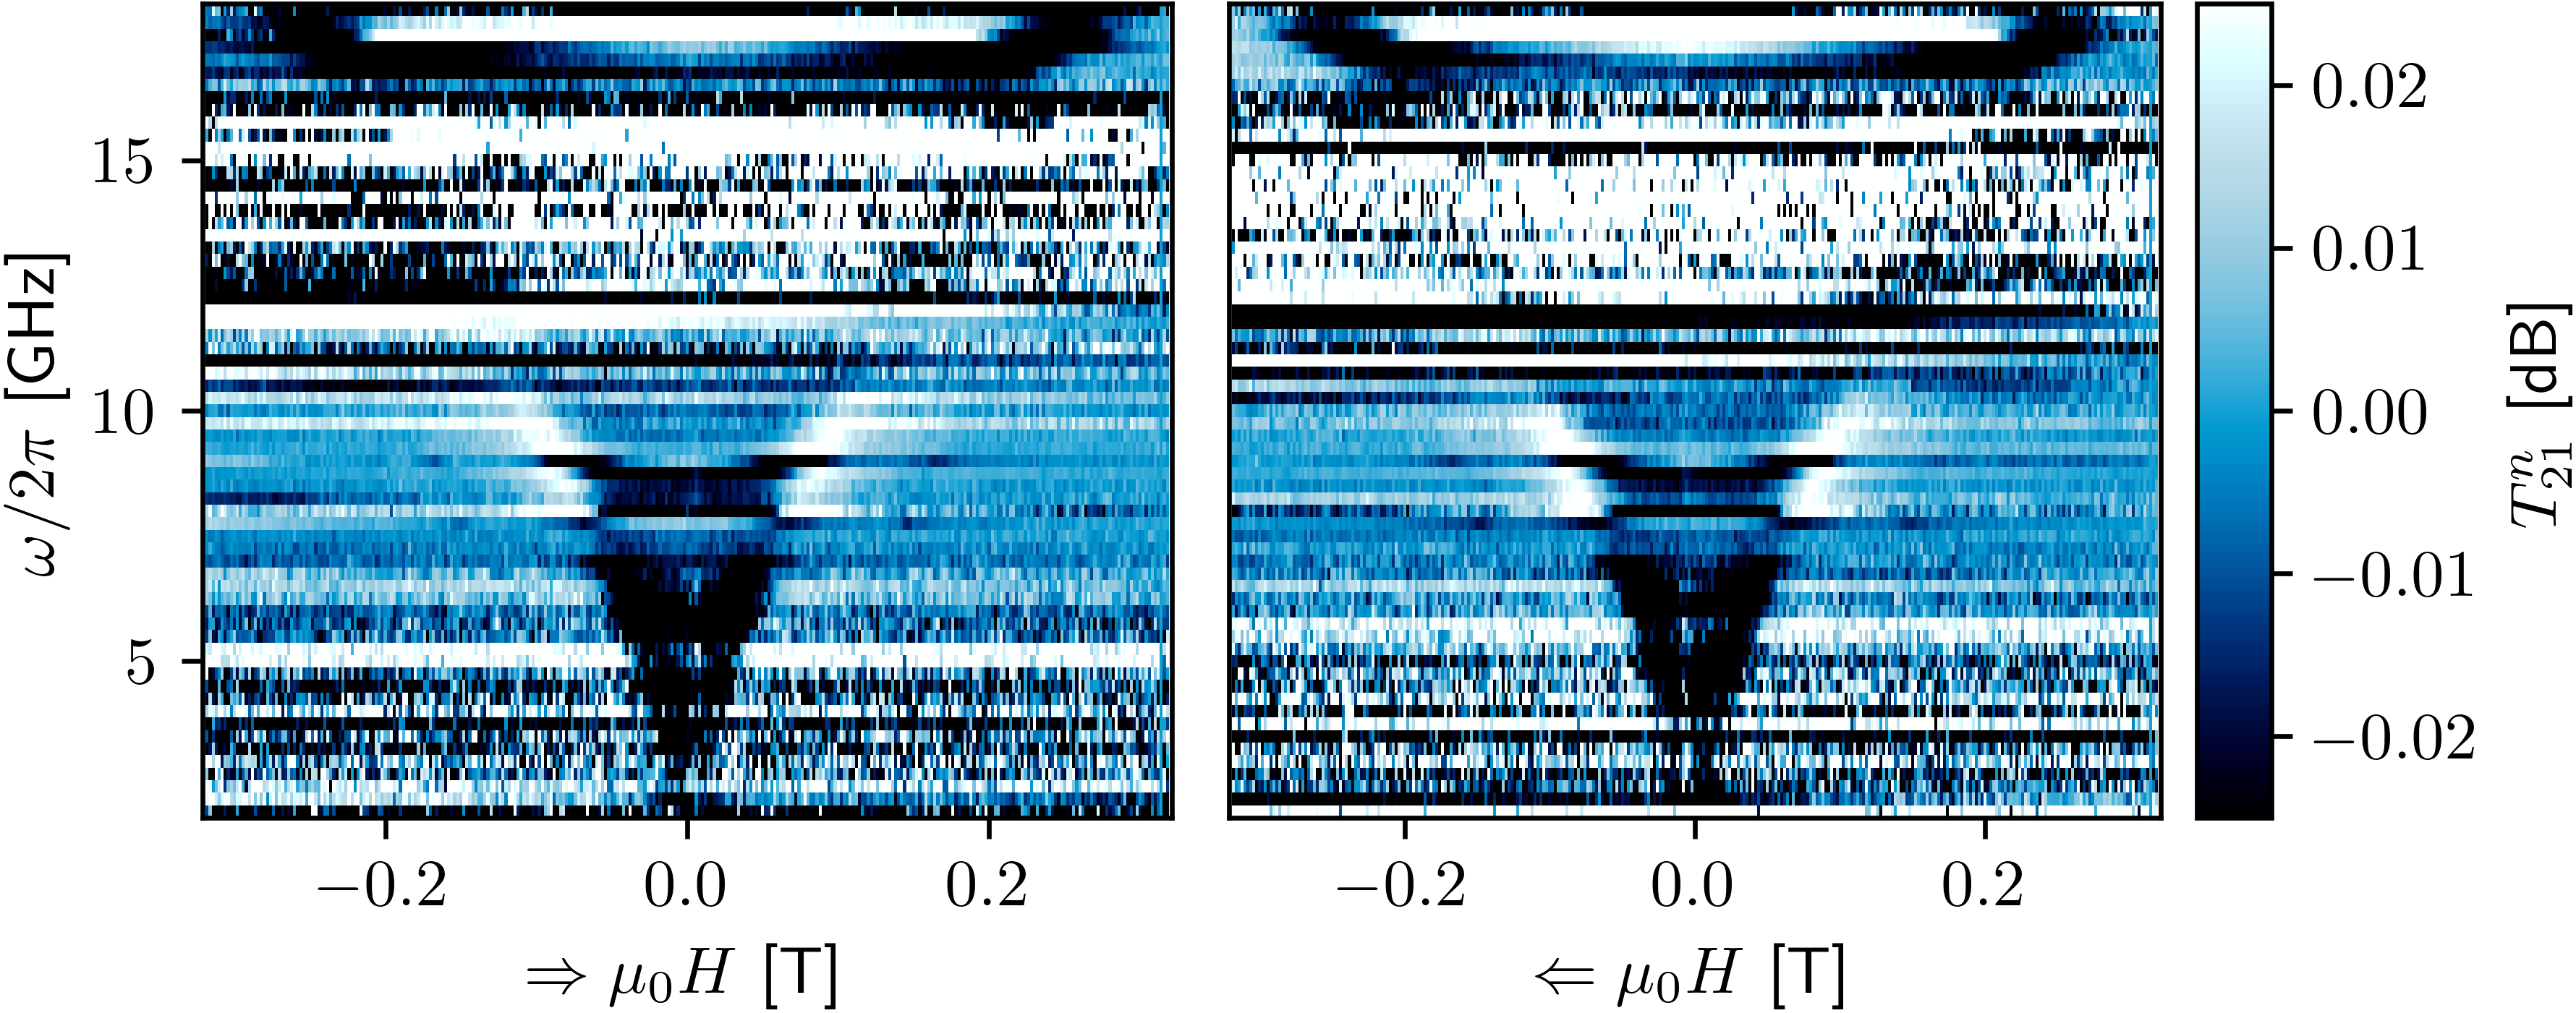

In [7]:
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

img_up=dn_bf_up['T21']
img_down=dn_bf_down['T21']
img=np.concatenate((img_up,img_down))
f=dn_bf_down['f']
H=dn_bf_up['H']

Hlim=(-.33,.33)
flim=(2,18)
contrast=1
fig_nr=0

xlabel_up='$\Rightarrow \mu_0H$ [T]'
xlabel_down='$\Leftarrow \mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
clabel='$T^n_{21}$ [dB]'

# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(f[-1]-f[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(f-flim[0]).argmin(),
      np.abs(f-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     f[find[0]]-stepsizef,
     f[find[1]-1]+stepsizef]
f=f[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

img[img==-np.inf]=np.nan
img[img==np.inf]=np.nan
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))
clim=(-.025,.025)

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_img_up, ax_img_down, ax_clb) = plt.subplots(ncols=3,
                                    gridspec_kw={"width_ratios":[2.6,2.5,.2]},
                                                     figsize=(6,2.4),
                                    constrained_layout=True)        
ax_img_down.set_yticks([])
ax_img_down.set_yticklabels([])

im_down = ax_img_down.imshow(img_down, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img_down.set_xlabel(xlabel_down)
#ax_img_down.set_xticks([-.1,.1,0])


# ax_img_down.plot([-.001,-.001], [2,10],'--', lw=1, 
#              color=cpd.curves(color='magenta')(1))
# ax_img_down.plot([0.005, .095], [2,10],'--', lw=1,
#              color=cpd.curves(color='magenta')(1))
# ax_img_down.plot([0.003, -.085], [2,10],'--', lw=1,
#              color=cpd.curves(color='magenta')(1))

im_up = ax_img_up.imshow(img_up, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img_up.set_xlabel(xlabel_up)
#ax_img_up.set_xticks([-.1,.1,0])
ax_img_up.set_ylabel(ylabel)
#ax_img_up.set_yticks(np.linspace(3,9,4))


# ax_img_up.plot([.008, .008], [2,10],'--', lw=1, 
#              color=cpd.curves(color='magenta')(1))
# ax_img_up.plot([0, .09], [2,10],'--', lw=1,
#              color=cpd.curves(color='magenta')(1))
# ax_img_up.plot([-0.00, -.09], [2,10],'--', lw=1,
#              color=cpd.curves(color='magenta')(1))

fig.colorbar(im_up,label=clabel, cax=ax_clb)

#fig.savefig('hysteresis.pgf')

<Figure size 3600x2160 with 0 Axes>

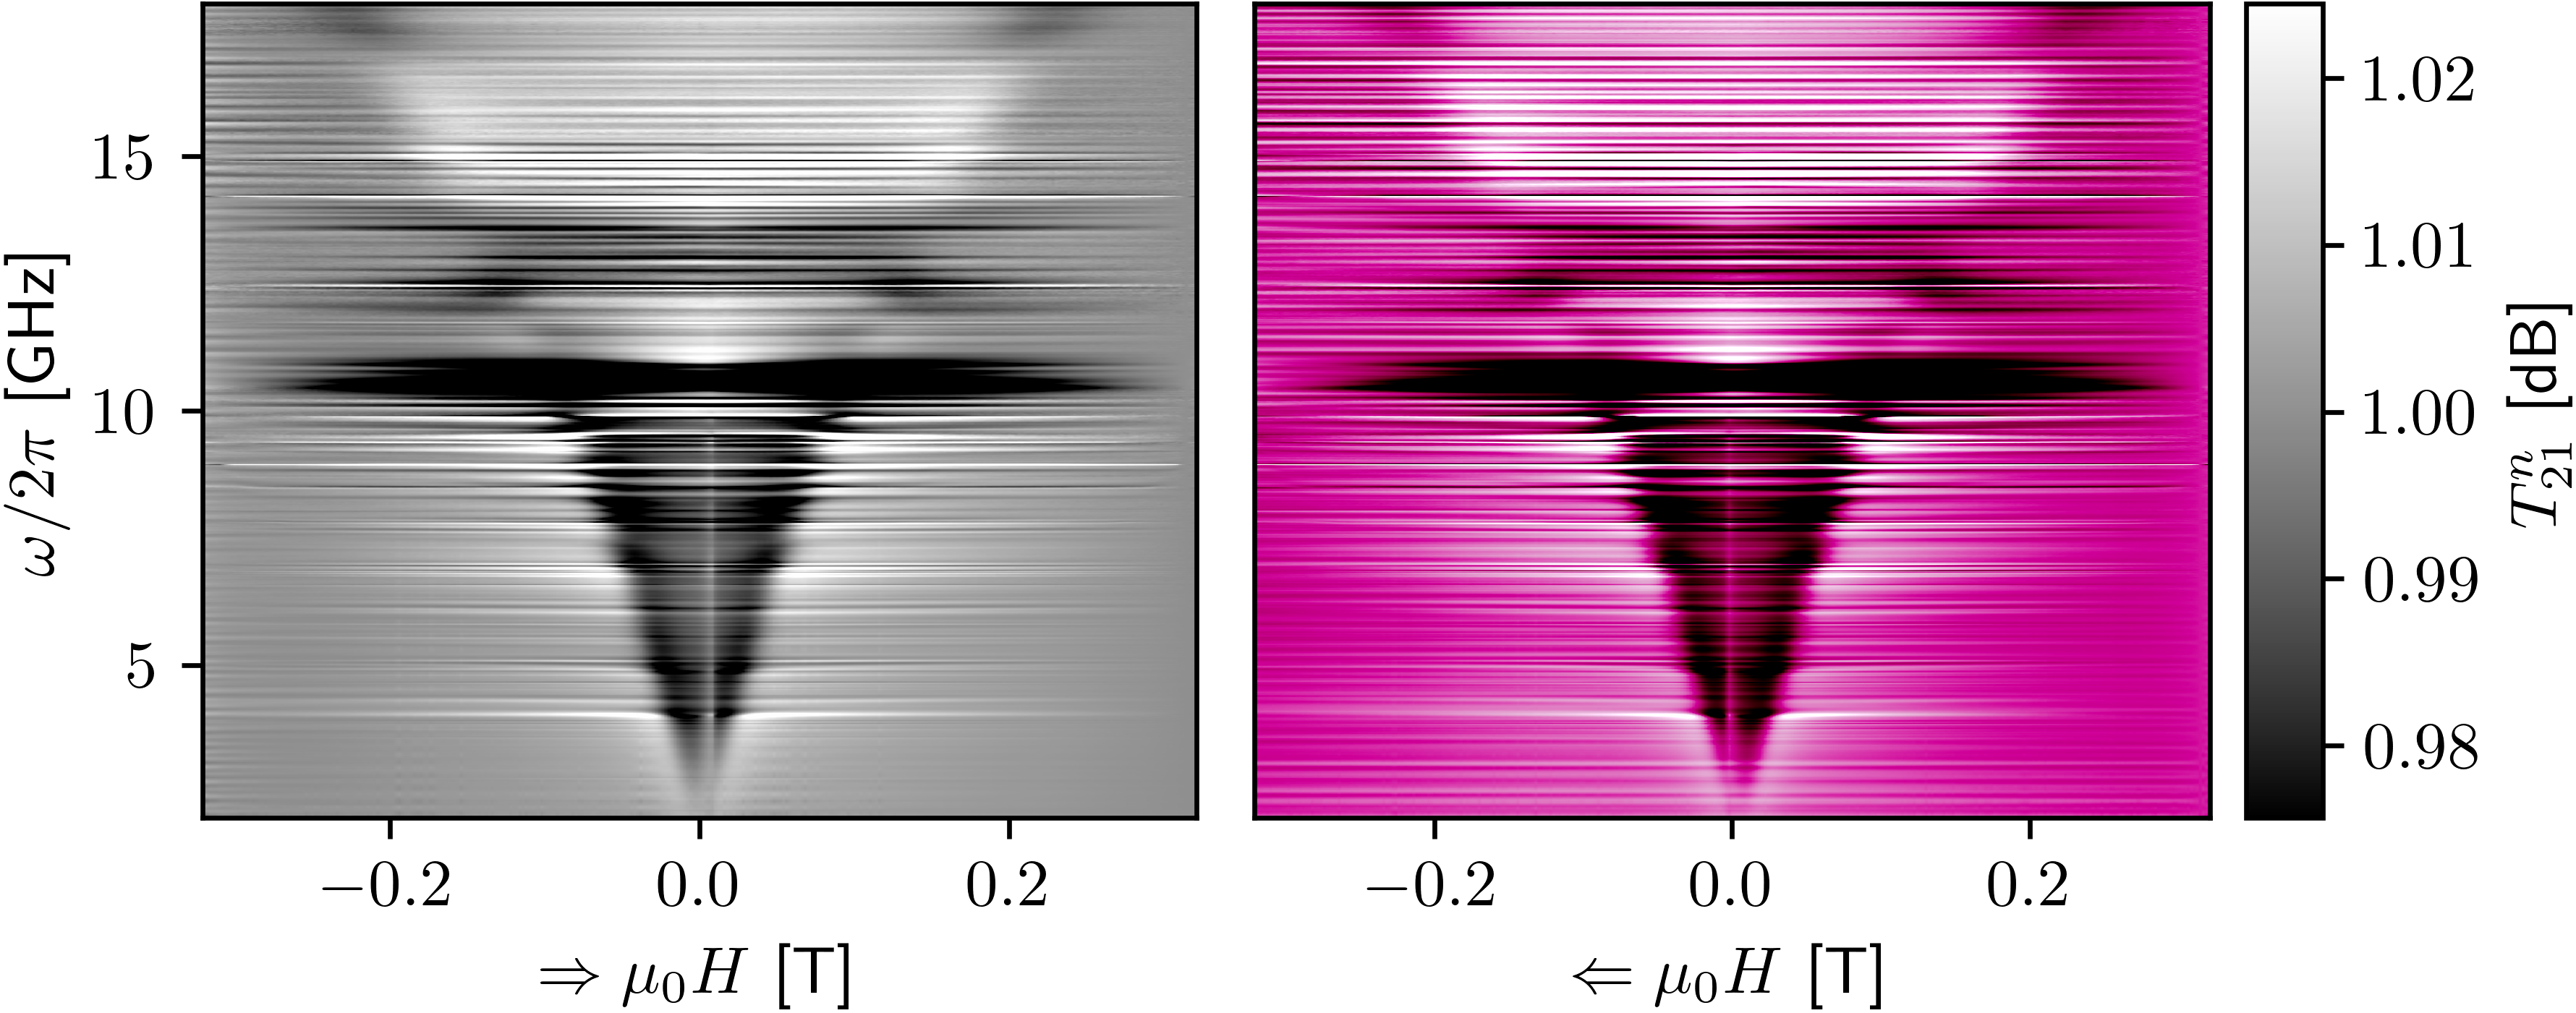

In [8]:
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

img_up=np.abs(dn_fh_up['S21'])
img_down=np.abs(dn_fh_down['S21'])
img=np.concatenate((img_up,img_down))
f=dn_fh_down['f']
H=dn_fh_up['H']

Hlim=(-.32,.32)
flim=(2,18)
contrast=1
fig_nr=0

xlabel_up='$\Rightarrow \mu_0H$ [T]'
xlabel_down='$\Leftarrow \mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
clabel='$T^n_{21}$ [dB]'

# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(f[-1]-f[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(f-flim[0]).argmin(),
      np.abs(f-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     f[find[0]]-stepsizef,
     f[find[1]-1]+stepsizef]
f=f[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

img[img==-np.inf]=np.nan
img[img==np.inf]=np.nan
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))
#clim=(.85,1.15)

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_img_up, ax_img_down, ax_clb) = plt.subplots(ncols=3,
                                    gridspec_kw={"width_ratios":[2.6,2.5,.2]},
                                                     figsize=(6,2.4),
                                    constrained_layout=True)        
ax_img_down.set_yticks([])
ax_img_down.set_yticklabels([])

im_down = ax_img_down.imshow(img_down, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images(color='magenta'))
ax_img_down.set_xlabel(xlabel_down)
#ax_img_down.set_xticks([-.1,.1,0])


# ax_img_down.plot([-.001,-.001], [2,10],'--', lw=1, 
#              color=cpd.curves(color='magenta')(1))
# ax_img_down.plot([0.005, .095], [2,10],'--', lw=1,
#              color=cpd.curves(color='magenta')(1))
# ax_img_down.plot([0.003, -.085], [2,10],'--', lw=1,
#              color=cpd.curves(color='magenta')(1))

im_up = ax_img_up.imshow(img_up, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images(color='grey'))
ax_img_up.set_xlabel(xlabel_up)
#ax_img_up.set_xticks([-.1,.1,0])
ax_img_up.set_ylabel(ylabel)
#ax_img_up.set_yticks(np.linspace(3,9,4))


# ax_img_up.plot([.008, .008], [2,10],'--', lw=1, 
#              color=cpd.curves(color='magenta')(1))
# ax_img_up.plot([0, .09], [2,10],'--', lw=1,
#              color=cpd.curves(color='magenta')(1))
# ax_img_up.plot([-0.00, -.09], [2,10],'--', lw=1,
#              color=cpd.curves(color='magenta')(1))

fig.colorbar(im_up,label=clabel, cax=ax_clb)

#fig.savefig('hysteresis.pgf')

<Figure size 3600x2160 with 0 Axes>

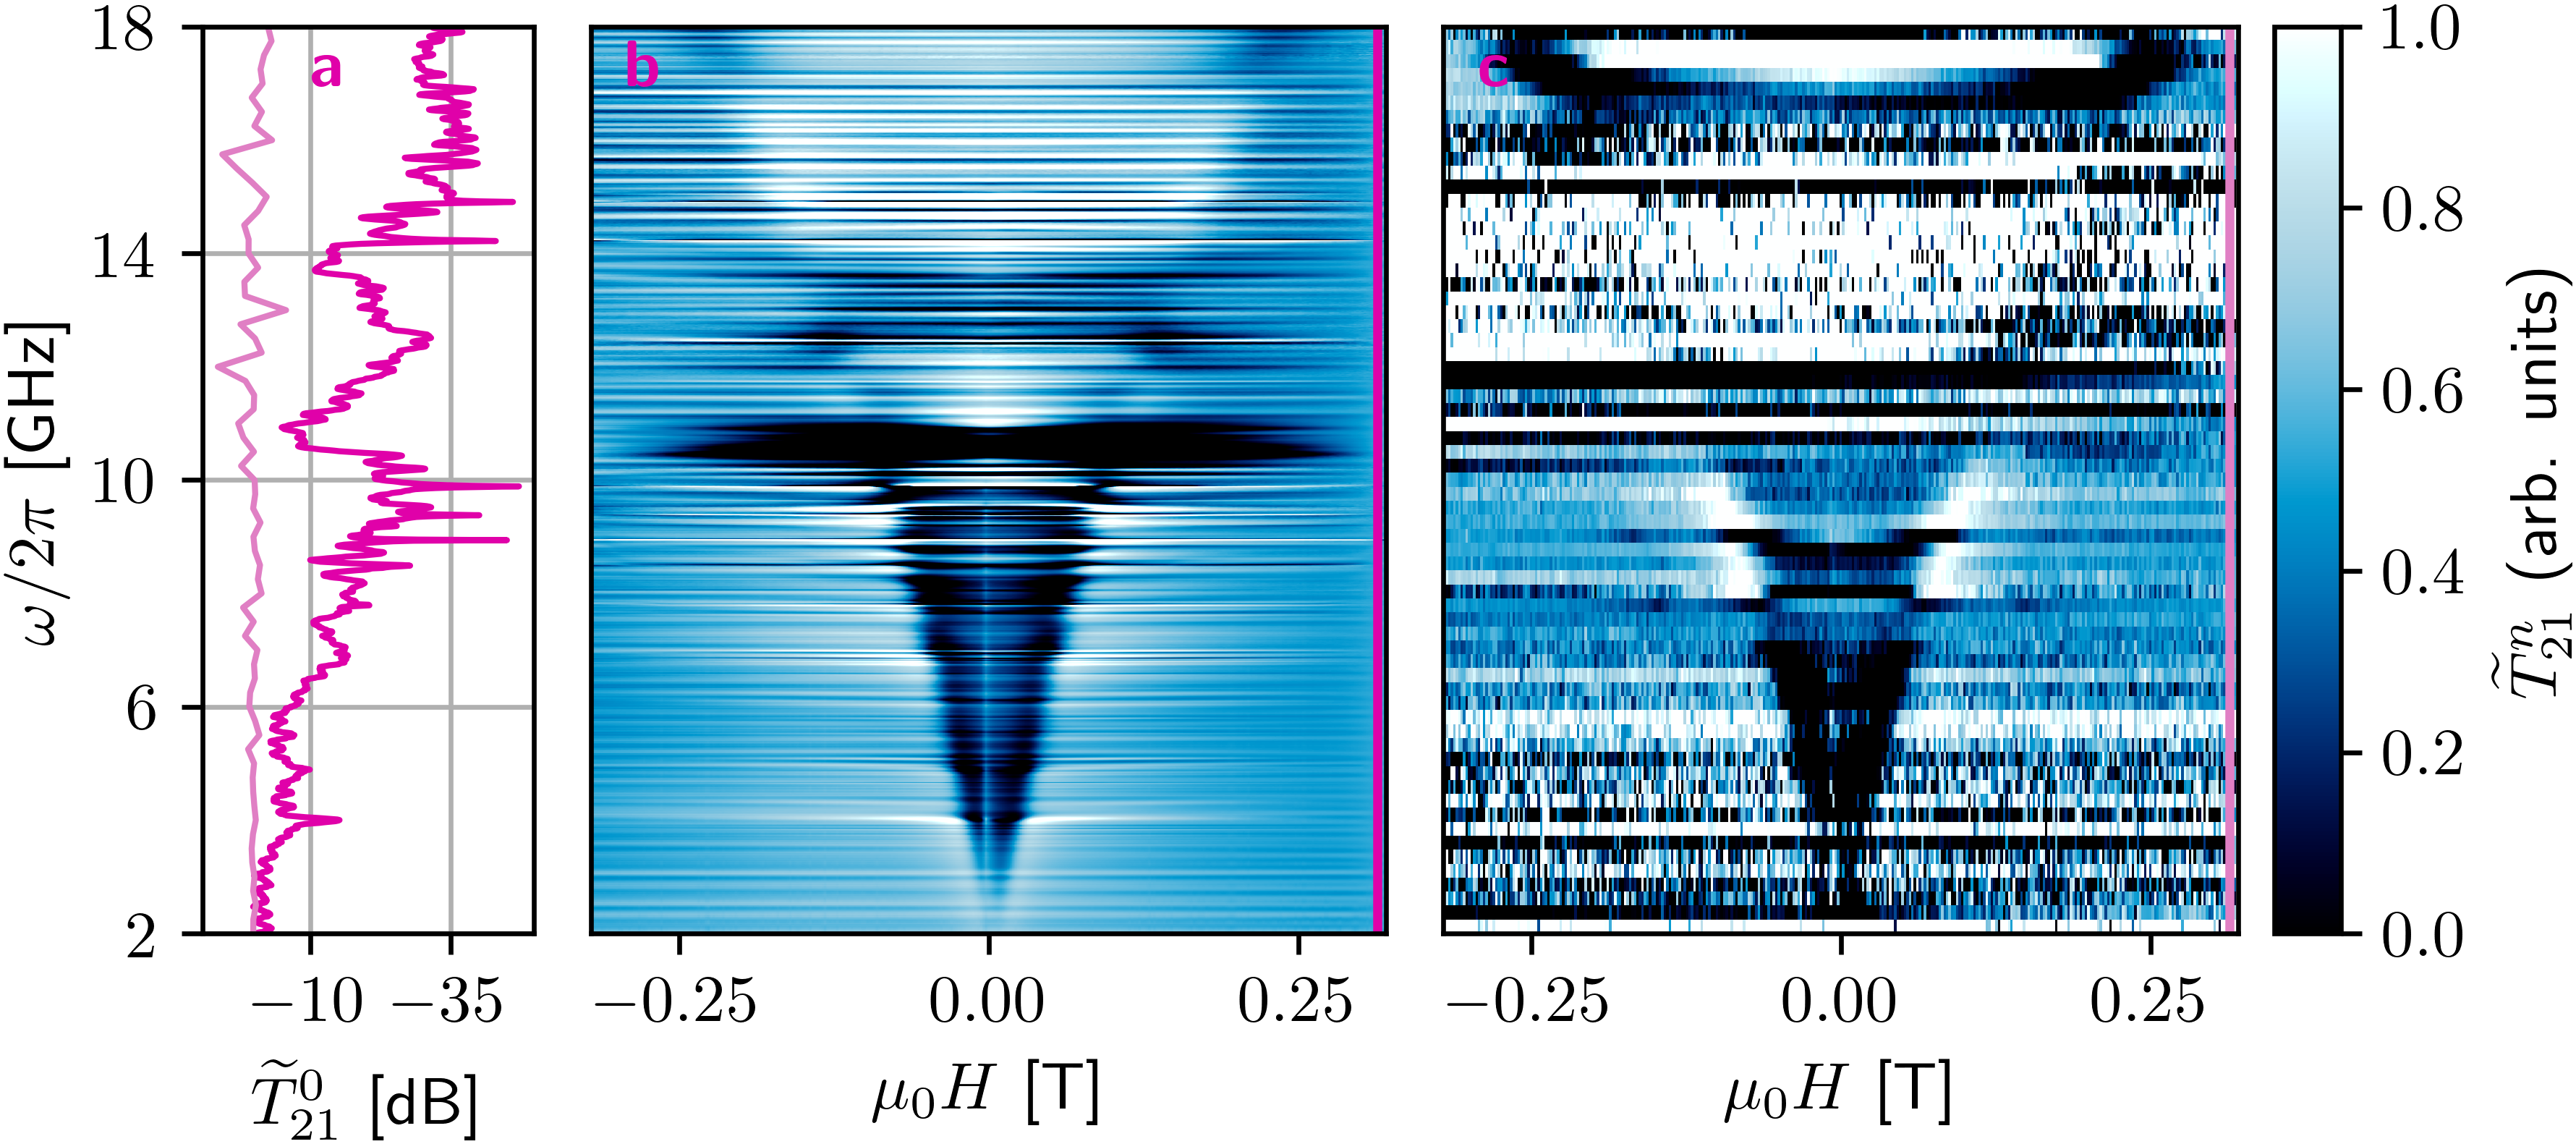

In [14]:

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

img0=20*np.log10(np.abs(dn_fh_down['S21']))
img0=(img0-np.nanmin(img0))/np.nanmax(img0)
norm0=20*np.log10(np.abs(dn_fh_down['S21norm']))
posN0=dn_fh_down['Hnorm']
H0=dn_fh_down['H']
freq0=dn_fh_down['f']

img1=dn_bf_down['T21']
norm1=dn_bf_down['T21norm']
posN1=dn_bf_down['Hnorm']
H1=dn_bf_down['H']
freq1=dn_bf_down['f']

Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$\widetilde{T}_{21}^0$ [dB]'
clabel='$\widetilde{T}^n_{21}$ (arb. units)'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH0=np.abs(H0[0]-H0[1])/2
stepsizef0=np.abs(freq0[-1]-freq0[-2])/2
Hind0=[np.abs(H0-Hlim[0]).argmin(),
      np.abs(H0-Hlim[1]).argmin()+1]
find0=[np.abs(freq0-flim[0]).argmin(),
      np.abs(freq0-flim[1]).argmin()+1]
img0=img0[find0[0]:find0[1],
        Hind0[0]:Hind0[1]]
ext0=[H0[Hind0[0]]-stepsizeH0,
     H0[Hind0[1]-1]+stepsizeH0,
     freq0[find0[0]]-stepsizef0,
     freq0[find0[1]-1]+stepsizef0]
freq0=freq0[find0[0]:find0[1]]
H0=H0[Hind0[0]:Hind0[1]]

stepsizeH1=np.abs(H1[0]-H1[1])/2
stepsizef1=np.abs(freq1[-1]-freq1[-2])/2
Hind1=[np.abs(H1-Hlim[0]).argmin(),
      np.abs(H1-Hlim[1]).argmin()+1]
find1=[np.abs(freq1-flim[0]).argmin(),
      np.abs(freq1-flim[1]).argmin()+1]
img1=img1[find1[0]:find1[1],
        Hind1[0]:Hind1[1]]
ext1=[H1[Hind1[0]]-stepsizeH1,
     H1[Hind1[1]-1]+stepsizeH1,
     freq1[find1[0]]-stepsizef1,
     freq1[find1[1]-1]+stepsizef1]
freq1=freq1[find1[0]:find1[1]]
H1=H1[Hind1[0]:Hind1[1]]

img0[img0==-np.inf]=np.nan
img0[img0==np.inf]=np.nan
clim0=(np.nanmean(img0)-contrast*np.nanstd(img0),
      np.nanmean(img0)+contrast*np.nanstd(img0))
clim1=(-.025,.025)
# img0=(img0-clim0[1])/clim0[0]
# clim0=(0,1)

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img0, ax_img1, ax_clb) = plt.subplots(ncols=4,figsize=(6,2.7),
                                    gridspec_kw={"width_ratios":[1,2.4,2.4,.2]},
                                    constrained_layout=True)        

norm0=norm0[find0[0]:find0[1]]
ax_norm.plot(norm0,freq0,c=cpd.curves(color='magenta')(1)) 
norm1=norm1[find1[0]:find1[1]] 
ax_norm.plot(norm1,freq1,c=cpd.images(color='magenta')(.65))    
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext0[2],ext0[3])
ax_norm.grid()
ax_norm.invert_xaxis()
ax_norm.set_yticks([18,14,10,6,2])

nlim0=[np.min(norm0),np.max(norm0)]
enn0=np.abs(nlim0[1]-nlim0[0])/4
nlim0=np.around(([(nlim0[0]+enn0)*2,(nlim0[1]-enn0)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim0)

# Take care of image and colorbar   
ax_img0.set_yticks([])
ax_img0.set_yticklabels([])
im0 = ax_img0.imshow(img0, 
                   extent=ext0, 
                   aspect='auto',
                   origin='lower',
                   clim=clim0,
                   cmap=cpd.images())
ax_img0.set_xlabel(xlabel)
ax_img0.vlines(posN0, ymin=ext0[2], ymax=ext0[3], lw=1.5,
             color=cpd.curves(color='magenta')(1),
             label="$H_n=%3.2f\,$T"%float(posN0))

ax_img1.set_yticks([])
ax_img1.set_yticklabels([])
im1 = ax_img1.imshow(img1, 
                   extent=ext1, 
                   aspect='auto',
                   origin='lower',
                   clim=clim1,
                   cmap=cpd.images())
ax_img1.set_xlabel(xlabel)
ax_img1.vlines(posN1, ymin=ext1[2], ymax=ext1[3], lw=1.5,
             color=cpd.images(color='magenta')(.65),
             label="$H_n=%3.2f\,$T"%float(posN1))

#ax_norm.text(nlim[0],ext[2]+(ext[3]-ext[2])/20, rotation='vertical',
# fig.text(.805,.035,
#             "$H_n=%3.2f\,$T"%float(posN0),
#             color=cpd.curves(color='magenta')(1),
#             bbox=dict(facecolor='white', 
#                       edgecolor=cpd.curves(color='magenta')(1), 
#                       boxstyle='round'))
#ax_clb.set_xticks([0])
# ax_clb.set_xlabel("$H_n=%3.2f\,$T"%float(posN),
#              color=cpd.curves(color='seeblau')(1))

#ax_img0.set_xticks(np.linspace(.1,.9,5))
#ax_img0.set_xticks(list(ax_img.get_xticks()))
#ax_img.get_xticklabels()[-1].set_color(cpd.images(color='magenta')(.5))

ax_img0.set_xlim(ext0[0],ext0[1])
ax_img0.set_ylim(ext0[2],ext0[3])

sm = plt.cm.ScalarMappable(cmap=cpd.images(), norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
fig.colorbar(sm, cax=ax_clb,label=clabel)
#cbar=fig.colorbar(im0,label=clabel, cax=ax_clb, norm=.78)
#cbar.set_ticks([1,0])
#cbar.ax.tick_params(size=0)

ax_norm.annotate(r'\textbf{a}',xy=(0, 1), xycoords='axes fraction',xytext=(150, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_img0.annotate(r'\textbf{b}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_img1.annotate(r'\textbf{c}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')

fig.savefig('setup_comp.pgf')

In [10]:
img0, np.nanmin(img0), np.nanmax(img0)

(array([[0.79101077, 0.79081136, 0.79098888, ..., 0.78616816, 0.7855163 ,
         0.78469003],
        [0.79136998, 0.79116514, 0.79125049, ..., 0.78600526, 0.78505423,
         0.78381296],
        [0.79344459, 0.79317965, 0.79337815, ..., 0.78606914, 0.78490502,
         0.78325262],
        ...,
        [0.78575478, 0.78636268, 0.78686112, ..., 0.78557782, 0.78537934,
         0.78522493],
        [0.79539412, 0.79544464, 0.79578222, ..., 0.78664057, 0.78683857,
         0.78674473],
        [0.793064  , 0.79264218, 0.79217691, ..., 0.78539972, 0.78626948,
         0.78578727]]),
 0.0,
 1.786146801279532)

In [14]:
def binning(d, 
           fmin=False,
           fmax=False,
           Hmin=False,
           Hmax=False,
           Nf=False,
           NH=False):
    
    # Get Binning extent
    if Hmin is False:
        Hmin=np.nanmin(d['H'])
    if Hmax is False:
        Hmax=np.nanmax(d['H'])
    if fmin is False:
        fmin=np.nanmin(d['f'])
    if fmax is False:
        fmax=np.nanmax(d['f'])
    ext=[[Hmin,Hmax], [fmin,fmax]]
        
    # Get Binning resolution
    checkH=np.argmin(np.abs(d['H']-Hmax))-np.argmin(np.abs(d['H']-Hmin))+1
    if NH is False:NH=checkH
    elif NH>checkH:print('Error: Oversampling in H-direction!')
        
    checkf=np.argmin(np.abs(d['f']-fmax))-np.argmin(np.abs(d['f']-fmin))+1
    if Nf is False:Nf=checkf
    elif Nf>checkf:print('Error: Oversampling in f-direction!')
    res=[NH,Nf]
    
    # Get 2D grids
    abso=d['T21']
    HH, ff =np.meshgrid(d['H'],d['f'])
    
    # from 2D grids, to 1D rows
    X, Y = np.ravel(HH), np.ravel(ff)
    Zabso = np.ravel(abso)
    
    # Bin that stuff
    abso_SUM, x,y = np.histogram2d(X,Y,
                                   bins=res, 
                                   range=ext, 
                                   normed=False, 
                                   weights=Zabso)
    counter, x,y = np.histogram2d(X,Y,
                                  bins=res, 
                                  range=ext, 
                                  normed=False, 
                                  weights=None)
    
    # get that binned stuff back together.
    db={'ext(H,f)':[Hmin,Hmax,fmin,fmax],
        'res(H,f)':[NH,Nf]}
    db['T21']=abso_SUM.T/counter.T
    db['f']=np.linspace(fmin,fmax,Nf)
    db['H']=np.linspace(Hmin,Hmax,NH)
    return db

In [21]:
def normT21(db,Hnorm='max'):
    '''
    db: H,f,S21
    Hnorm: 'max', 'min', 'ext', [-1,1]
    
    return
    dn: H, Hnorm, S21, S21norm, f
    '''
    
    H=db['H']
    abso=db['T21']
    
    # get Positions
    if Hnorm=='max':
        pos=[np.argmin(np.abs(H-np.nanmax(H)))]
    elif Hnorm=='min':
        pos=[np.argmin(np.abs(H-np.nanmin(H)))]
    elif Hnorm=='ext':
        pos=[np.argmin(np.abs(H-np.nanmax(H))),
             np.argmin(np.abs(H-np.nanmin(H)))]
    else:
        pos= [0 for x in range(len(Hnorm))]
        for i,h in enumerate(Hnorm):
            pos[i]=np.argmin(np.abs(H-h))
    
    
    
    # get Normalization
    lenpos=len(pos)
    Habso=0
    Hnorm=[]
    for p in pos:
        Habso=Habso+abso[:,p]/lenpos
        Hnorm.append(H[pos])
        
    # gridden
    X = np.ones((len(H)))
    ones, HHabso   = np.meshgrid(X,Habso)
    
    # Normen
    HHT21=HHabso
    norm=1/np.abs(HHT21)
    abso=abso*norm
    
    # Build normated Dataset
    dn={}
    dn['H']=H
    dn['Hnorm']=np.array(Hnorm)
    dn['T21']=abso
    dn['T21norm']=Habso
    dn['f']=db['f']
    
    return dn